### Part 1: Predicting Building Energy Efficiency (Supervised Learning)

Scenario - You are working for an architecture firm, and your task is to build a model that predicts the energy efficiency rating of buildings based on features like wall area, roof area, overall height, etc.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [5]:
# Generate synthetic dataset for building features and energy efficiency ratings
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)

In [6]:
# Data preprocessing
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

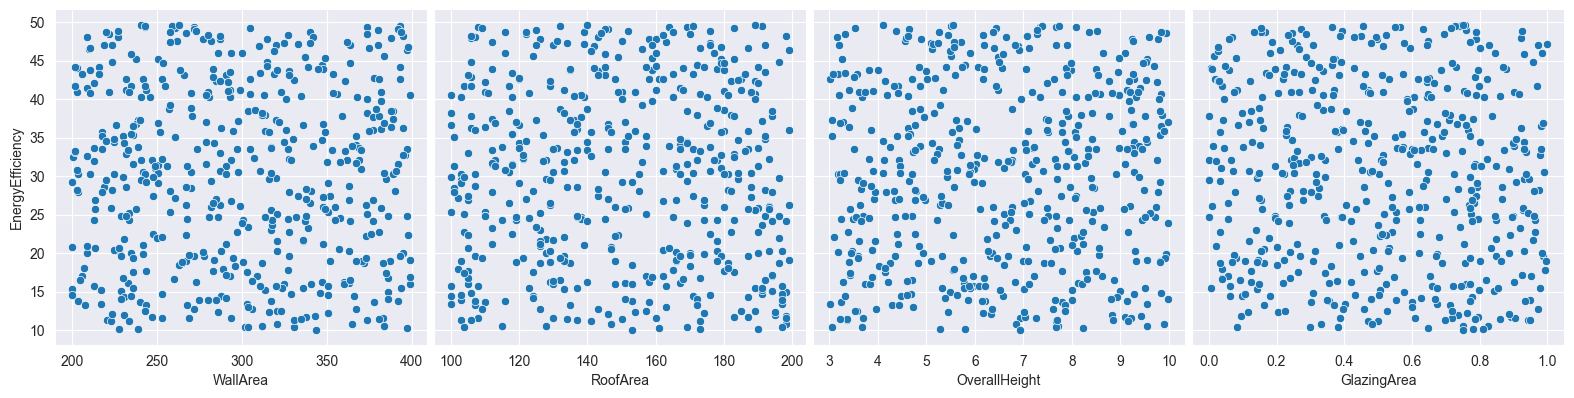

In [7]:
# Visualize the relationships between features and the target variable (Energy Efficiency)
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()

In [8]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(400, 4) (100, 4)
(400,) (100,)


In [9]:
# Train a Random Forest model

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}\nRMSE: {rmse}')

Mean Squared Error: 132.0750563149049
RMSE: 11.49239123572222


In [11]:
df['EnergyEfficiency'].describe()

count    500.000000
mean      30.088269
std       11.585715
min       10.110320
25%       19.696093
50%       30.465381
75%       40.557190
max       49.590595
Name: EnergyEfficiency, dtype: float64

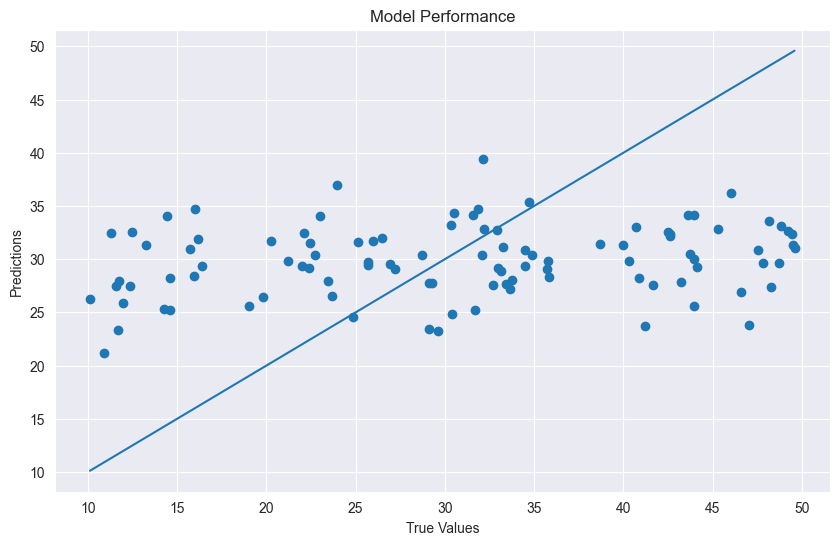

In [12]:
# Plot the True Value vs predicted values

plt.figure(figsize=[10, 6])
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Model Performance')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

### Part 2: Vehicle Clustering (Unsupervised Learning)
Scenario - You are working for an automotive company, and your task is to cluster vehicles into groups based on their features such as weight, engine size, and horsepower.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# Generate synthetic dataset for vehicles
np.random.seed(0)
data_size = 300
data = {
    'Weight': np.random.randint(1000, 3000, data_size),
    'EngineSize': np.random.uniform(1.0, 4.0, data_size),
    'Horsepower': np.random.randint(50, 300, data_size)
}
df = pd.DataFrame(data)

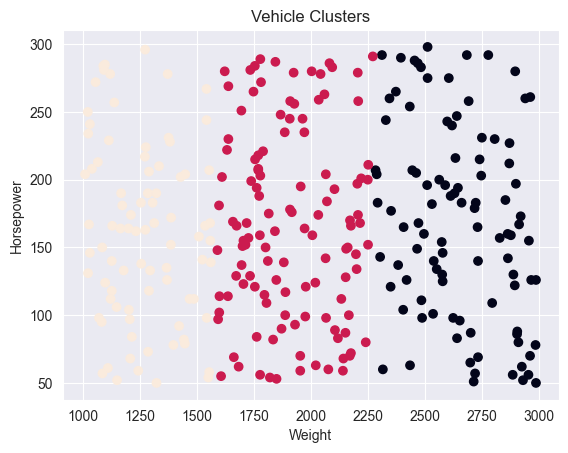

In [3]:
# No labels are needed for unsupervised learning
X = df

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plotting the clusters
plt.scatter(df['Weight'], df['Horsepower'], c=kmeans.labels_)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Vehicle Clusters')
plt.show()